In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
mydata = pd.read_csv("Wine.csv")
mydata.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
# Getting shape of the dataset
mydata.shape

(178, 14)

In [3]:
# Getting info of the dataset
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# Describing the dataset
mydata.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
# Checking Missing Values
mydata.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### Compute and plot those feature which are related to each other?

<AxesSubplot:xlabel='Alcohol', ylabel='Malic_Acid'>

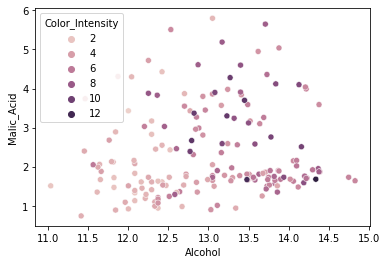

In [13]:
# Scatterplot is used to see the datas scattered based on color_intensity.
sns.scatterplot(data=mydata,x="Alcohol",y="Malic_Acid",hue="Color_Intensity")

<AxesSubplot:xlabel='Ash', ylabel='Ash_Alcanity'>

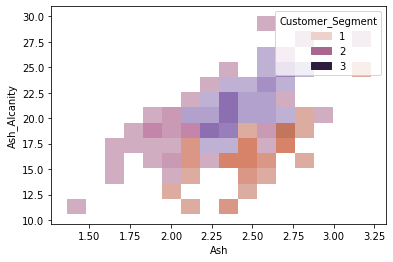

In [16]:
# Here we use histplot to see the datas scattered based on customer_segment
sns.histplot(data=mydata,x="Ash",y="Ash_Alcanity",hue="Customer_Segment")

<AxesSubplot:xlabel='Flavanoids', ylabel='Nonflavanoid_Phenols'>

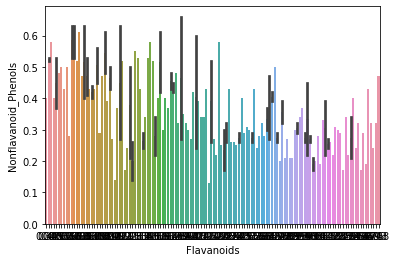

In [20]:
sns.barplot(data=mydata,x="Flavanoids",y="Nonflavanoid_Phenols")

<AxesSubplot:xlabel='Magnesium', ylabel='Proline'>

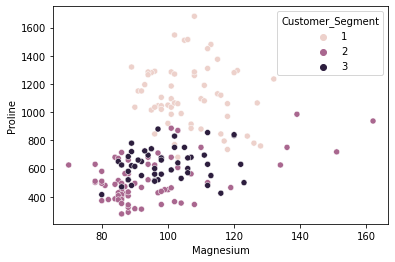

In [23]:
# Scatterplot is used to plot the datas based on customer_segment.
sns.scatterplot(data=mydata,x="Magnesium",y="Proline",hue="Customer_Segment")

<AxesSubplot:>

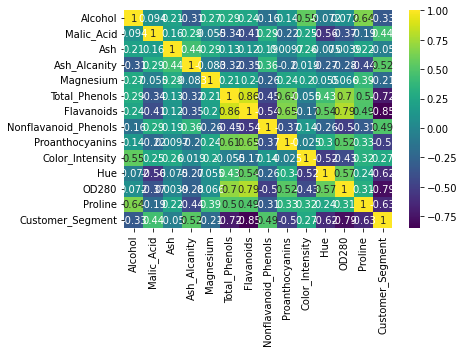

In [24]:
# We are using heatmap to sind if there is any collinearity.
sns.heatmap(data=mydata.corr(),annot=True,cmap='viridis')

### What are the optimum number of principal components in PCA?

### Q3.Build a KNN classifier considering optimal number of principal components and value of K and state its score.
### Q4.Build a SVM Classifier and tune the hyperparameters to get the optimum model.
### Q5.Build a Naive Bayes Classifier and comment about its accuracy.

In [40]:
models = {
    
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC()
}

In [41]:
# Train-Test split
x = mydata.iloc[:,:-1]
y = mydata.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=28)

In [42]:
# train the models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(xtrain, ytrain)
    y_pred_test = model.predict(xtest)
    y_pred_train = model.predict(xtrain)
    print(f"Testing Report for {name}...")
    print(classification_report(ytest, y_pred_test))
    print(confusion_matrix(ytest, y_pred_test))
    print()
    print(f"Training Report for {name}...")
    print(classification_report(ytrain, y_pred_train))
    print(confusion_matrix(ytrain, y_pred_train))
    print()

Training KNN...
Testing Report for KNN...
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.87      0.71      0.78        28
           3       0.53      0.75      0.62        12

    accuracy                           0.76        54
   macro avg       0.75      0.77      0.75        54
weighted avg       0.79      0.76      0.77        54

[[12  0  2]
 [ 2 20  6]
 [ 0  3  9]]

Training Report for KNN...
              precision    recall  f1-score   support

           1       0.89      0.91      0.90        45
           2       0.72      0.72      0.72        43
           3       0.69      0.67      0.68        36

    accuracy                           0.77       124
   macro avg       0.77      0.77      0.77       124
weighted avg       0.77      0.77      0.77       124

[[41  1  3]
 [ 4 31  8]
 [ 1 11 24]]

Training NB...
Testing Report for NB...
              precision    recall  f1-score   support

### Q6.Compare all of the models and justify your choice about the optimum model.

In [43]:
# cross-validation of models
cv_results = {}
for name, model in models.items():
    print(f"Cross-validation for {name}...")
    results = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')
    cv_results[name] = results

cv_results = pd.DataFrame(cv_results)
print(cv_results)

Cross-validation for KNN...
Cross-validation for NB...
Cross-validation for SVM...
        KNN    NB       SVM
0  0.640000  0.96  0.720000
1  0.520000  0.96  0.640000
2  0.600000  1.00  0.720000
3  0.800000  0.92  0.640000
4  0.583333  1.00  0.583333


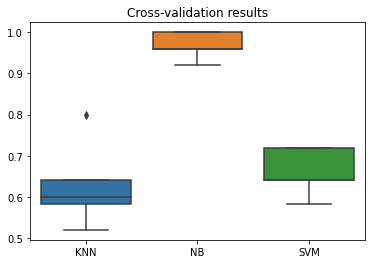

In [44]:
# By Boxplot cross_val_score results are given
sns.boxplot(data=cv_results)
plt.title("Cross-validation results")
plt.show()

C:\Users\HP\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


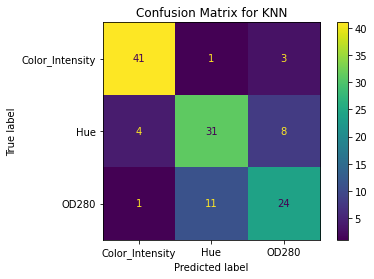

C:\Users\HP\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


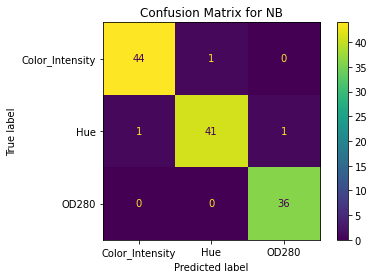

C:\Users\HP\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


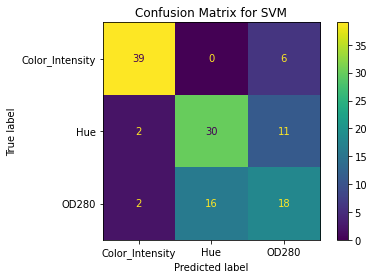

In [46]:
for name,model in models.items():
    plot_confusion_matrix(model, xtrain, ytrain, display_labels=['Color_Intensity','Hue','OD280'])
    plt.title(f"Confusion Matrix for {name}")
    plt.show()